# 202001549 장희권

In [1]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\82107\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
station_files = glob('지역*.xls')

In [3]:
tmp_list = []

for file_name in station_files:
    tmp = pd.read_excel(file_name, header=2)
    tmp_list.append(tmp)

In [4]:
stations = pd.concat(tmp_list)
stations

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,인천광역시,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,032-555-9143,Y,-,1573,1835,-
1,인천광역시,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,032-552-5185,Y,1999,1583,1864,-
2,인천광역시,그린에너지,인천 계양구 솔고개길 2,S-OIL,032-584-5189,N,-,1584,1864,1650
3,인천광역시,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,032-519-9922,Y,-,1585,1856,-
4,인천광역시,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,032-513-8903,N,-,1595,1865,-
...,...,...,...,...,...,...,...,...,...,...
22,인천광역시,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,032-934-1235,N,-,1699,1899,1550
23,인천광역시,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,032-933-8700,N,-,1719,1899,1600
24,인천광역시,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,032-932-5039,N,-,1720,1995,1600
25,인천광역시,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,032-933-8155,N,-,1790,1998,1690


In [5]:
stations_sel = stations.loc[:, ['상호', '주소', '상표', '셀프여부', '휘발유', '경유']]
stations_sel = stations_sel.query("휘발유 != '-'").copy()
stations_sel = stations_sel.query("경유 != '-'").copy()
stations_sel

,상호,주소,상표,셀프여부,휘발유,경유
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,1835
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,1864
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,1864
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,1856
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,1865
...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,1899
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,1899
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,1995
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,1998


In [6]:
diesel_stations = stations_sel[['상호', '주소', '상표', '셀프여부', '경유']]
diesel_stations.columns = ['상호', '주소', '상표', '셀프여부', '가격']
diesel_stations['종류'] = '경유'
gu_list = []

for address in stations_sel['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)

diesel_stations['군/구'] = gu_list

diesel_stations

,상호,주소,상표,셀프여부,가격,종류,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1835,경유,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1864,경유,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1864,경유,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1856,경유,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1865,경유,계양구
...,...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1899,경유,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1899,경유,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1995,경유,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1998,경유,강화군


In [7]:
gasoline_stations = stations_sel[['상호', '주소', '상표', '셀프여부', '휘발유']]
gasoline_stations.columns = ['상호', '주소', '상표', '셀프여부', '가격']
gasoline_stations['종류'] = '휘발유'
gu_list = []

for address in stations_sel['주소']:
    address_gu = address.split()[1]
    gu_list.append(address_gu)

gasoline_stations['군/구'] = gu_list

gasoline_stations

,상호,주소,상표,셀프여부,가격,종류,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,휘발유,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,휘발유,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,휘발유,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,휘발유,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,휘발유,계양구
...,...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1699,휘발유,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1719,휘발유,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1720,휘발유,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1790,휘발유,강화군


In [8]:
stations_sel = pd.concat([gasoline_stations, diesel_stations])
stations_sel

,상호,주소,상표,셀프여부,가격,종류,군/구
0,원천제2주유소,인천 계양구 벌말로 295,알뜰주유소,Y,1573,휘발유,계양구
1,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),현대오일뱅크,Y,1583,휘발유,계양구
2,그린에너지,인천 계양구 솔고개길 2,S-OIL,N,1584,휘발유,계양구
3,박촌주유소,인천 계양구 장제로 1021 (박촌동),현대오일뱅크,Y,1585,휘발유,계양구
4,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),GS칼텍스,N,1595,휘발유,계양구
...,...,...,...,...,...,...,...
22,세광주유소,인천 강화군 선원면 중앙로 205,S-OIL,N,1899,경유,강화군
23,한국주유소,인천 강화군 선원면 중앙로 445,자가상표,N,1899,경유,강화군
24,교동주유소,인천 강화군 교동면 대룡안길54번길 5,GS칼텍스,N,1995,경유,강화군
25,백마외포리주유소,인천 강화군 내가면 중앙로 1301,S-OIL,N,1998,경유,강화군


In [9]:
price_list = []
for price in stations_sel['가격']:
    price_new = int(price)
    price_list.append(price_new)

stations_sel['가격'] = price_list

In [10]:
stations_sel.reset_index(inplace=True)

del stations_sel['index']

stations_sel_name = stations_sel.set_index('상표')
stations_sel_name

,상호,주소,셀프여부,가격,종류,군/구
상표,,,,,,
알뜰주유소,원천제2주유소,인천 계양구 벌말로 295,Y,1573,휘발유,계양구
현대오일뱅크,현대오일뱅크(주)직영 계양IC셀프주유소,인천 계양구 서부간선로 250 (박촌동),Y,1583,휘발유,계양구
S-OIL,그린에너지,인천 계양구 솔고개길 2,N,1584,휘발유,계양구
현대오일뱅크,박촌주유소,인천 계양구 장제로 1021 (박촌동),Y,1585,휘발유,계양구
GS칼텍스,서일석유(주) 갈현주유소,인천 계양구 드림로 764 (갈현동),N,1595,휘발유,계양구
...,...,...,...,...,...,...
S-OIL,세광주유소,인천 강화군 선원면 중앙로 205,N,1899,경유,강화군
자가상표,한국주유소,인천 강화군 선원면 중앙로 445,N,1899,경유,강화군
GS칼텍스,교동주유소,인천 강화군 교동면 대룡안길54번길 5,N,1995,경유,강화군


In [11]:
# matplotlib 설정하기
plt.rc('font', family = "Malgun Gothic")
plt.rcParams['axes.unicode_minus'] = False
plt.style.use("ggplot")

# x축: 종류, y축: 가격, 색상: 셀프여부
1. 셀프가 셀프가 아닌 주유소보다 가격이 싸다.
2. 예전에는 경유가 휘발유보다 더 저렴했지만 국제 경유 가격 상승으로 인하여 경유가 더 비싸졌다

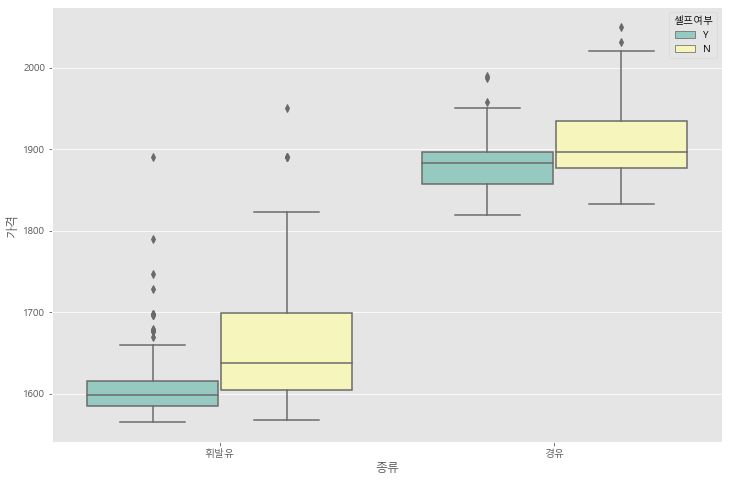

In [12]:
plt.figure(figsize=(12, 8))
     
sns.boxplot(x="종류", y="가격", hue="셀프여부", data=stations_sel, palette="Set3")
plt.show()

# x축: 상표, y축: 가격, 색상: 종류
1. 알뜰주유소는 말 그대로 진짜로 알뜰하게 싸다.
2. 자가 상표를 쓰는 주유소는 다른 상표가 있는 주유소보다 비싸다.

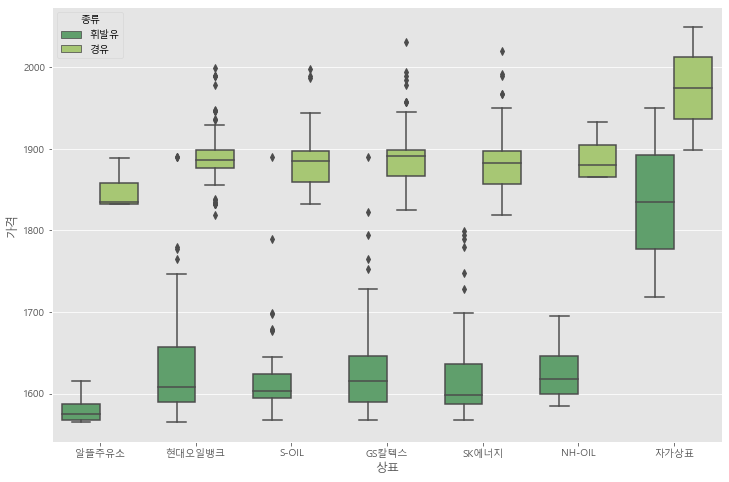

In [13]:
plt.figure(figsize=(12, 8))
     
sns.boxplot(x="상표", y="가격", hue="종류", data=stations_sel, palette="summer")
plt.show()

# x축: 군/구, y축: 가격, 색상: 종류
1. 도서 지역인 주인 중구, 강화군, 웅진군은 접근성과 운송비가 비싸 다른 육지 주유소 보다 기름값이 비싸다 
2. 현재 없어진 자치구인 남구가 포함되어 있다 
3. 도시 개발의 양극화가 일어나는 자치구인 연수구는 기름 값 분포가 크다.

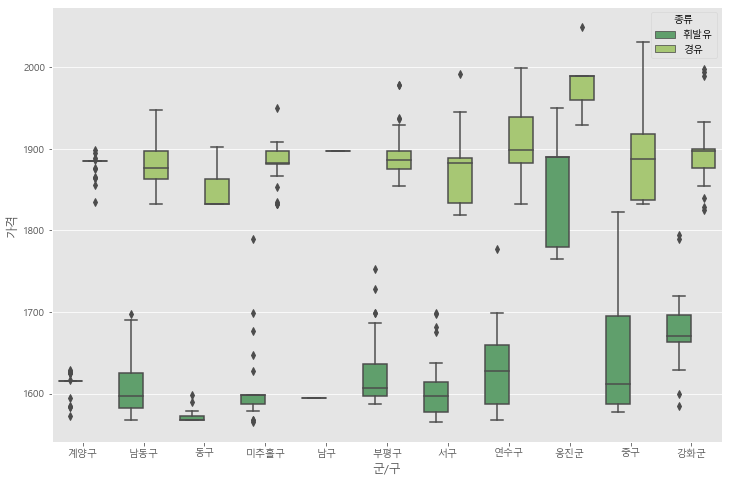

In [14]:
plt.figure(figsize=(12, 8))

# hue -> 색상
sns.boxplot(x="군/구", y="가격", hue="종류", data=stations_sel, palette="summer")
plt.show()

# 군/구가 남구인 데이터를 미추홀구로 변경해서 그래프 출력

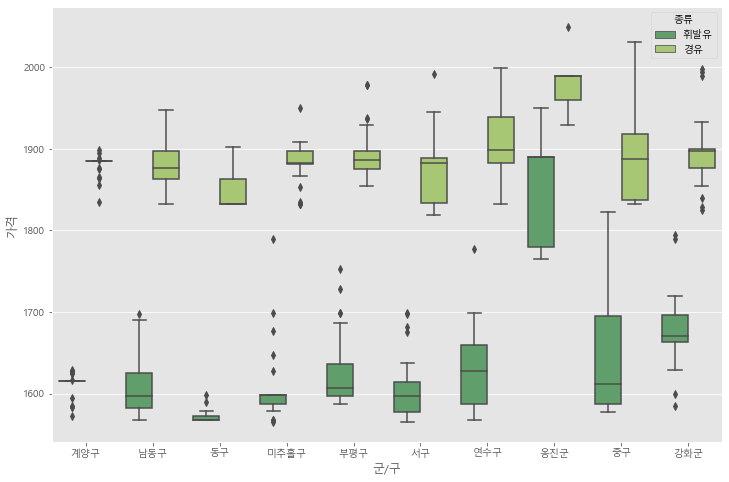

In [15]:
stations_sel.loc[stations_sel['군/구'] == '남구', '군/구'] = '미추홀구'
plt.figure(figsize=(12, 8))

# hue -> 색상
sns.boxplot(x="군/구", y="가격", hue="종류", data=stations_sel, palette="summer")
plt.show()

# 202001549 장희권